<a href="https://colab.research.google.com/github/deepu8185/html-portfolio/blob/main/Gait_project(final)_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Dataset Prepration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
import pickle

In [ ]:

# Read normal and abnormal data
normal = pd.read_csv("/content/gdrive/MyDrive/gait_stabilize/gait_dataset/normal.csv")
abnormal = pd.read_csv("/content/gdrive/MyDrive/gait_stabilize/gait_dataset/abnormal.csv")
normal_1 = pd.read_csv("/content/gdrive/MyDrive/gait_stabilize/gait_dataset/normal_1.csv")
abnormal_1 = pd.read_csv("/content/gdrive/MyDrive/gait_stabilize/gait_dataset/abnormal_1.csv")

In [ ]:

# concatenate normal data with normal_1 data
normal_data = pd.concat([normal,normal_1],axis=0,ignore_index = True)
abnormal_data = pd.concat([abnormal,abnormal_1],axis=0,ignore_index = True)

In [ ]:
# display first five rows for normal data
normal_data.head()

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,time,cur_time
0,2.60,9.43,0.37,0.02,0.03,0.01,0.621,10:58:05
1,2.08,9.61,0.51,0.13,0.14,0.08,1.179,10:58:05
2,1.82,9.67,0.60,0.05,0.11,0.02,1.683,10:58:06
3,1.69,9.57,0.89,0.05,0.12,0.17,2.169,10:58:06
4,0.05,9.39,-2.10,0.56,0.20,0.00,2.718,10:58:07


In [ ]:



# display first five rows for abnormal data
abnormal_data.head()

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,time,cur_time
0,0.01,10.27,1.13,0.23,0.51,0.04,0.593,11:07:09
1,-6.35,12.14,-7.68,0.21,1.26,0.08,1.033,11:07:09
2,2.63,9.63,0.82,0.11,0.01,0.23,1.551,11:07:10
3,3.15,9.42,0.87,0.01,0.01,0.00,2.070,11:07:10
4,2.61,9.52,0.85,0.02,0.00,0.29,2.603,11:07:11


In [ ]:
# information about dataset
normal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   accel_x   1370 non-null   float64
 1   accel_y   1370 non-null   float64
 2   accel_z   1370 non-null   float64
 3   gyro_x    1370 non-null   float64
 4   gyro_y    1370 non-null   float64
 5   gyro_z    1370 non-null   float64
 6   time      1370 non-null   float64
 7   cur_time  1370 non-null   object 
dtypes: float64(7), object(1)
memory usage: 85.8+ KB


In [ ]:
# information about dataset
abnormal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   accel_x   1545 non-null   float64
 1   accel_y   1545 non-null   float64
 2   accel_z   1545 non-null   float64
 3   gyro_x    1545 non-null   float64
 4   gyro_y    1545 non-null   float64
 5   gyro_z    1545 non-null   float64
 6   time      1545 non-null   float64
 7   cur_time  1545 non-null   object 
dtypes: float64(7), object(1)
memory usage: 96.7+ KB


In [ ]:
# statistics  about dataset
normal_data.describe()

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,time
count,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000
mean,1.353686,9.357642,-2.341095,-0.034912,0.443861,0.228883,220.085044
std,1.853277,2.177716,2.734178,1.202611,0.844180,0.867781,154.954210
min,-8.820000,0.370000,-12.630000,-3.600000,-4.970000,-3.130000,0.621000
25%,0.450000,8.885000,-3.700000,0.030000,0.090000,0.060000,87.677750
50%,1.675000,9.480000,-2.040000,0.280000,0.240000,0.250000,175.985500
75%,2.460000,10.140000,-1.192500,0.577500,0.620000,0.630000,352.176000
max,9.770000,28.970000,21.860000,2.960000,5.680000,2.500000,528.949000


In [ ]:

# statistics  about dataset
abnormal_data.describe()

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,time
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.00000,1545.000000,1545.000000
mean,2.005625,8.861398,-2.142123,0.285262,0.35200,0.244356,268.826326
std,2.263499,1.830659,2.467789,0.579132,0.59679,0.639144,189.792030
min,-6.380000,0.190000,-11.420000,-4.590000,-4.12000,-3.020000,0.593000
25%,0.750000,8.110000,-3.530000,0.090000,0.09000,0.080000,100.037000
50%,2.310000,9.170000,-1.880000,0.270000,0.23000,0.230000,235.284000
75%,3.410000,9.630000,-1.010000,0.560000,0.50000,0.510000,434.239000
max,12.650000,22.750000,24.720000,3.670000,4.95000,2.600000,633.390000


# Heat Map for normal

<ipython-input-10-a0720bff6113>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = normal_data.corr()


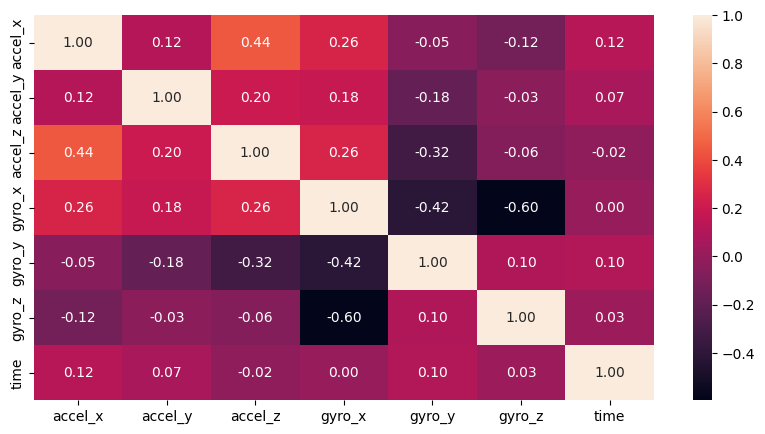

In [ ]:
corr = normal_data.corr()
fig, ax = plt.subplots(figsize = (10,5))

ax = sns.heatmap(corr, annot = True, fmt = '.2f')

# Heat map for abnormal

<ipython-input-11-4d9222d7d3da>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = abnormal_data.corr()


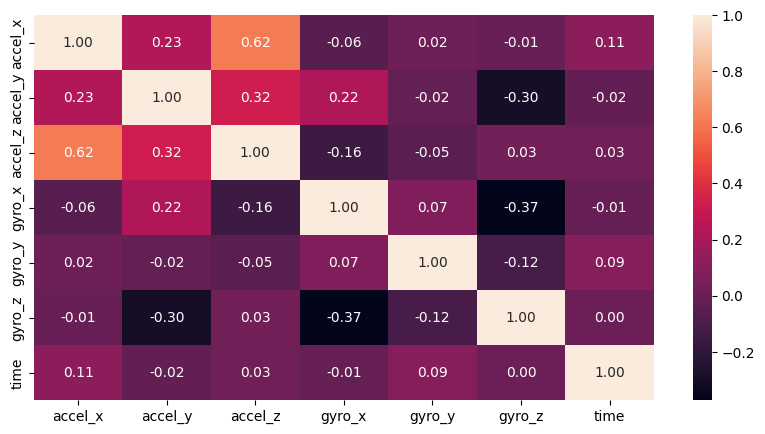

In [ ]:
corr = abnormal_data.corr()
fig, ax = plt.subplots(figsize = (10,5))

ax = sns.heatmap(corr, annot = True, fmt = '.2f')

# Comparision of Normal and Abnormal accelerometer data



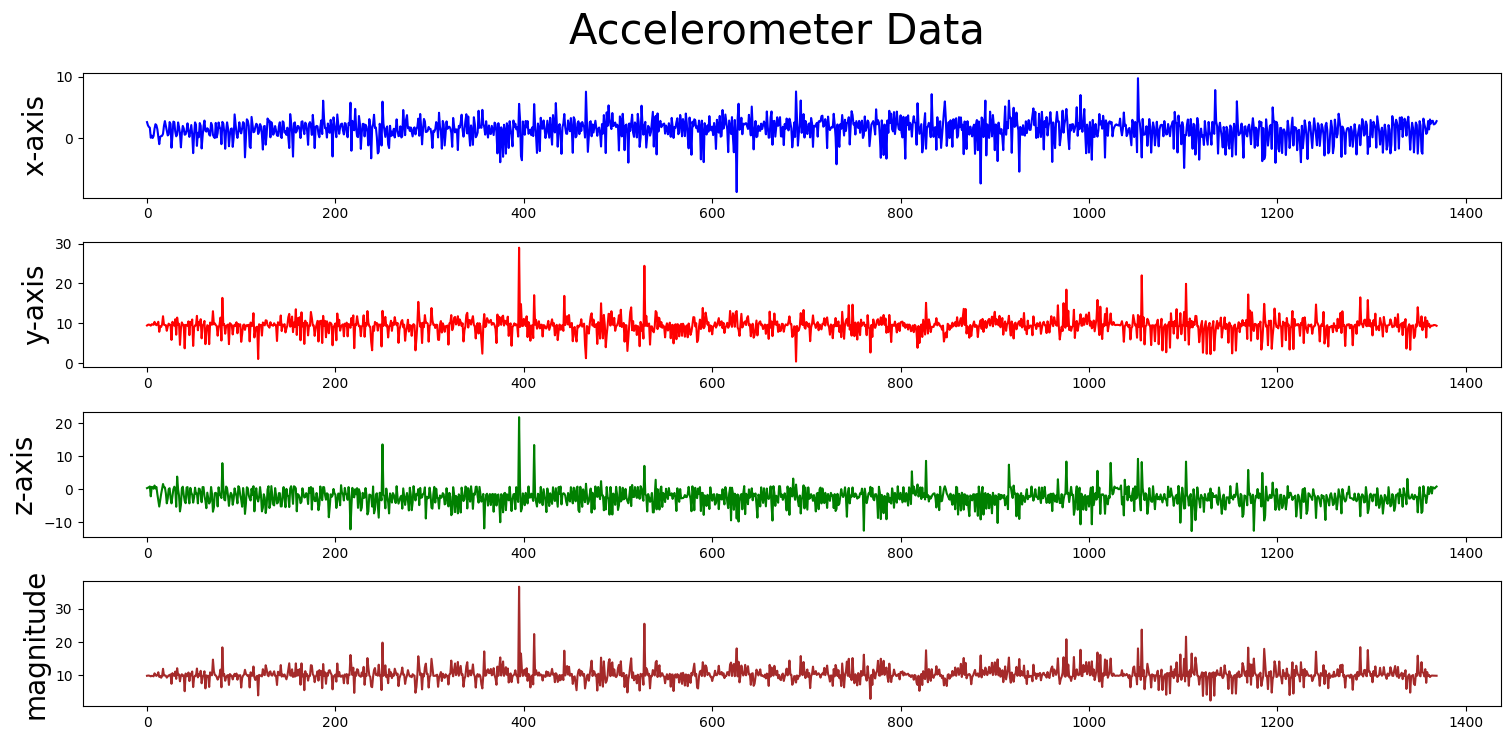

In [ ]:
# Normal x, y and z
fig, ax = plt.subplots(4,1)
fig.set_figheight(7.5)
fig.set_figwidth(15)

fig.suptitle("Accelerometer Data", fontsize = 30)
fig.tight_layout()

ax[0].plot(normal_data['accel_x'], 'b')
ax[0].set_ylabel('x-axis', fontdict = {'size':20})
# ax[0].set_ylim(-5,5)

ax[1].plot(normal_data['accel_y'], 'r')
ax[1].set_ylabel('y-axis', fontdict = {'size':20})
# ax[1].set_ylim(-5,5)

ax[2].plot(normal_data['accel_z'], 'g')
ax[2].set_ylabel('z-axis', fontdict = {'size':20})
# ax[2].set_ylim(-5,5)

normal_data['accel_mag'] = (normal_data['accel_x'] ** 2 + normal_data['accel_y'] ** 2 + normal_data['accel_z'] ** 2) ** 0.5
ax[3].plot(normal_data['accel_mag'], 'brown')
ax[3].set_ylabel('magnitude', fontdict = {'size':20})

plt.show()

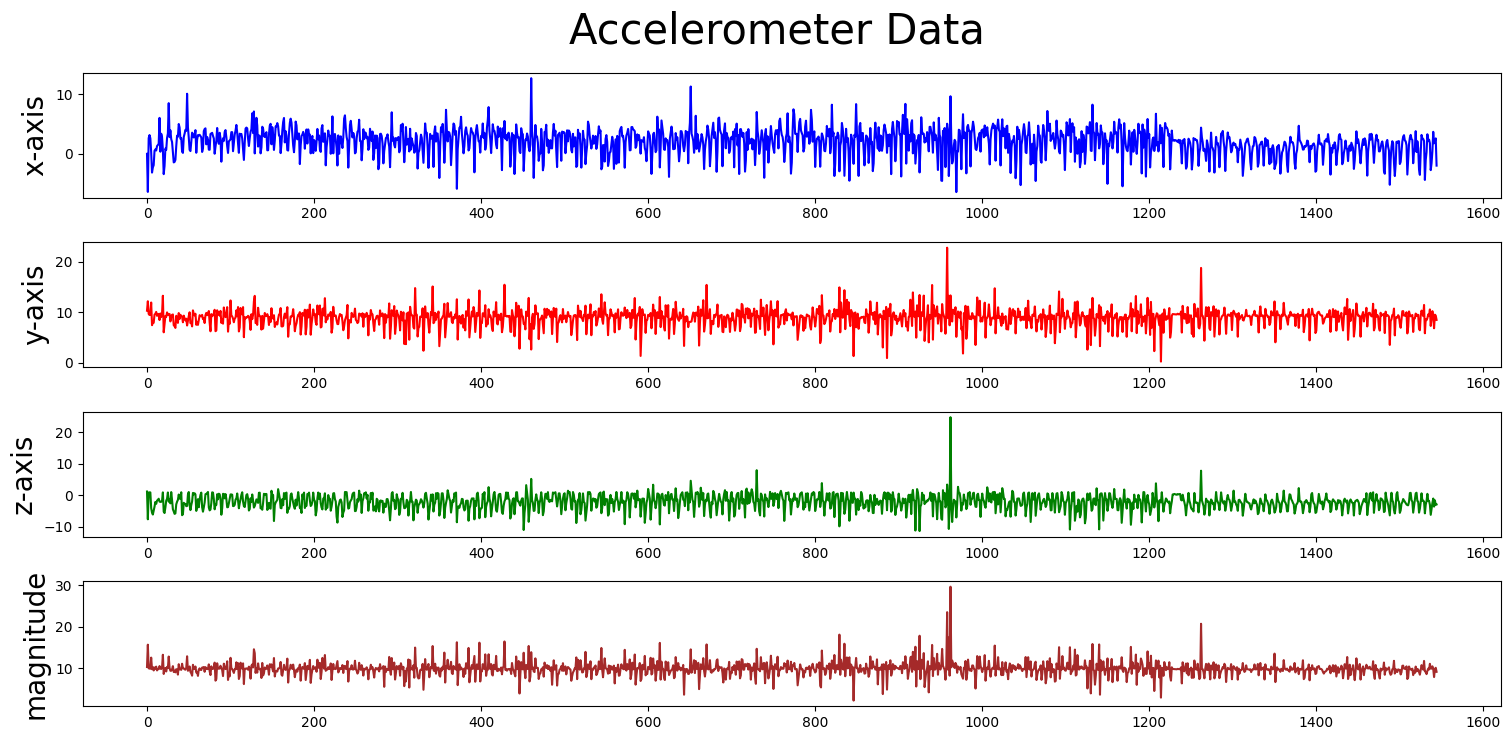

In [ ]:

# Abnormal x, y and z
fig, ax = plt.subplots(4,1)
fig.set_figheight(7.5)
fig.set_figwidth(15)

fig.suptitle("Accelerometer Data", fontsize = 30)
fig.tight_layout()

ax[0].plot(abnormal_data['accel_x'], 'b')
ax[0].set_ylabel('x-axis', fontdict = {'size':20})
# ax[0].set_ylim(-5,5)

ax[1].plot(abnormal_data['accel_y'], 'r')
ax[1].set_ylabel('y-axis', fontdict = {'size':20})
# ax[1].set_ylim(-5,5)

ax[2].plot(abnormal_data['accel_z'], 'g')
ax[2].set_ylabel('z-axis', fontdict = {'size':20})
# ax[2].set_ylim(-5,5)

abnormal_data['accel_mag'] = (abnormal_data['accel_x'] ** 2 + abnormal_data['accel_y'] ** 2 + abnormal_data['accel_z'] ** 2) ** 0.5
ax[3].plot(abnormal_data['accel_mag'], 'brown')
ax[3].set_ylabel('magnitude', fontdict = {'size':20})

plt.show()

In [ ]:

normal_data

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,time,cur_time,accel_mag
0,2.60,9.43,0.37,0.02,0.03,0.01,0.621,10:58:05,9.788861
1,2.08,9.61,0.51,0.13,0.14,0.08,1.179,10:58:05,9.845740
2,1.82,9.67,0.60,0.05,0.11,0.02,1.683,10:58:06,9.858058
3,1.69,9.57,0.89,0.05,0.12,0.17,2.169,10:58:06,9.758745
4,0.05,9.39,-2.10,0.56,0.20,0.00,2.718,10:58:07,9.622089
...,...,...,...,...,...,...,...,...,...
1365,2.82,9.39,0.65,0.17,0.06,0.10,174.843,17:34:01,9.825833
1366,2.22,9.56,0.40,0.07,0.06,0.04,174.843,17:34:01,9.822525
1367,2.29,9.54,0.27,0.04,0.06,0.01,175.794,17:34:02,9.814713
1368,2.45,9.49,0.64,0.17,0.01,0.02,175.796,17:34:02,9.822026


Text(0.5, 1.0, 'Peaks detection in Abnormal Magnitude')

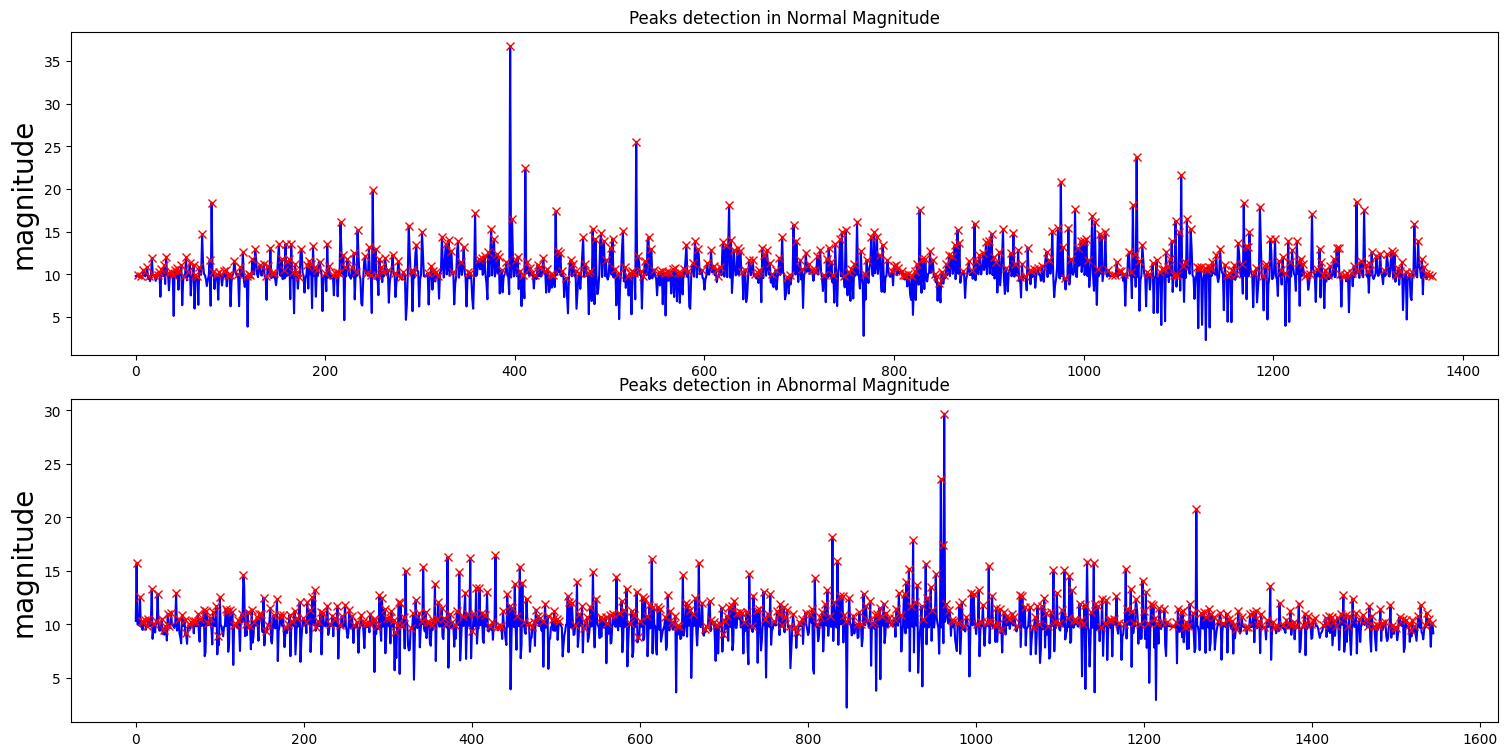

In [ ]:
from scipy.signal import find_peaks
fig, ax = plt.subplots(2,1)
fig.set_figheight(7.5)
fig.set_figwidth(15)

# fig.suptitle("Peak detection in Normal and Abnormal Magnitude", fontsize = 30)
fig.tight_layout()

npeaks, _ = find_peaks(normal_data['accel_mag'], height=7)

ax[0].plot(normal_data['accel_mag'], 'b')
ax[0].plot(npeaks, normal_data['accel_mag'][npeaks], "rx")
ax[0].set_ylabel('magnitude', fontdict = {'size':20})
ax[0].set_title('Peaks detection in Normal Magnitude')

abpeaks, _ = find_peaks(abnormal_data['accel_mag'], height=7)

ax[1].plot(abnormal_data['accel_mag'], 'b')
ax[1].plot(abpeaks, abnormal_data['accel_mag'][abpeaks], "rx")
ax[1].set_ylabel('magnitude', fontdict = {'size':20})
ax[1].set_title('Peaks detection in Abnormal Magnitude')


In [ ]:
print('No. of Steps taken by Normal Person:', len(npeaks))
print('No. of Steps taken by AbNormal Person:', len(abpeaks))

No. of Steps taken by Normal Person: 467
No. of Steps taken by AbNormal Person: 521




# Comparison of Normal and Abnormal gyroscope data



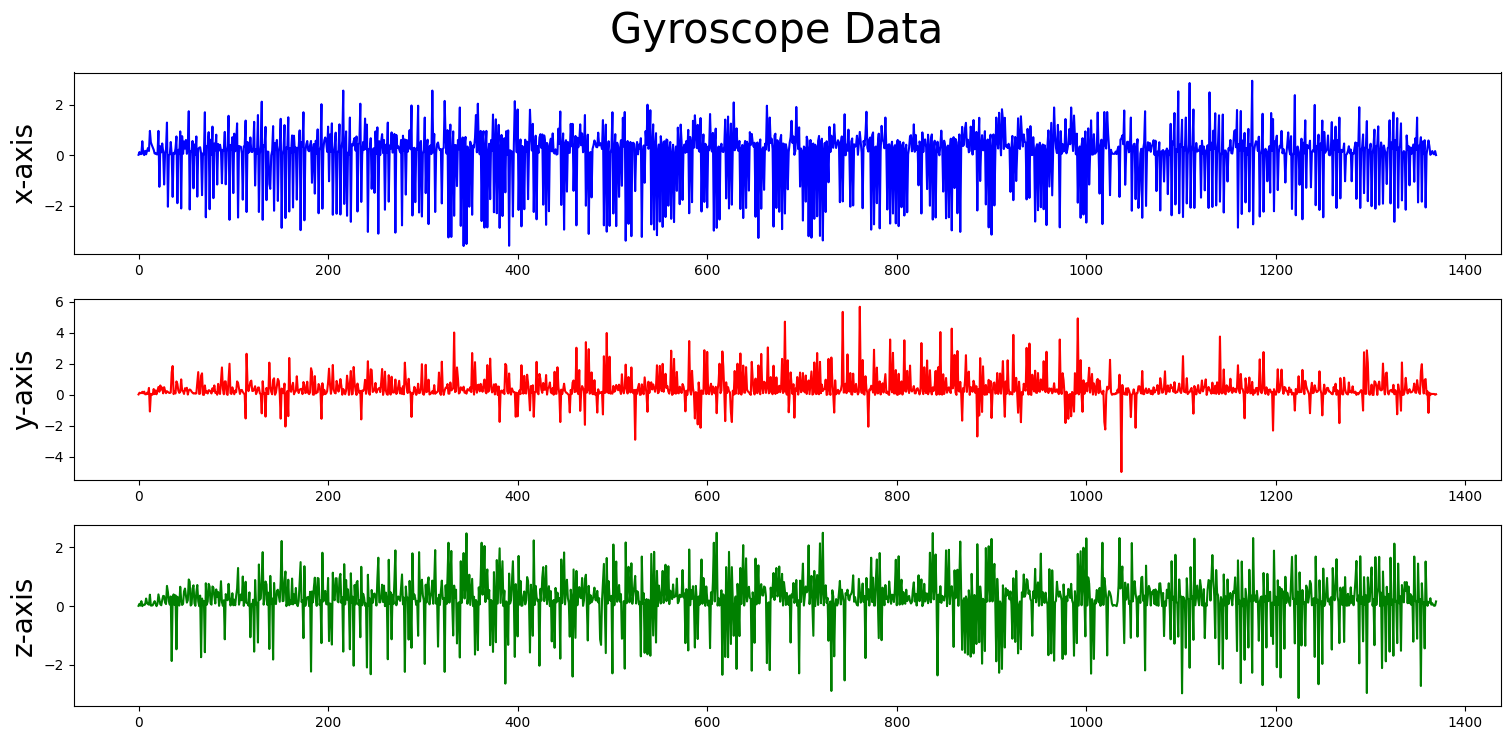

In [ ]:
# Normal x, y and z
fig, ax = plt.subplots(3,1)
fig.set_figheight(7.5)
fig.set_figwidth(15)

fig.suptitle("Gyroscope Data", fontsize = 30)
fig.tight_layout()

ax[0].plot(normal_data['gyro_x'], 'b')
ax[0].set_ylabel('x-axis', fontdict = {'size':20})
# ax[0].set_ylim(-5,5)

ax[1].plot(normal_data['gyro_y'], 'r')
ax[1].set_ylabel('y-axis', fontdict = {'size':20})
# ax[1].set_ylim(-5,5)

ax[2].plot(normal_data['gyro_z'], 'g')
ax[2].set_ylabel('z-axis', fontdict = {'size':20})
# ax[2].set_ylim(-5,5)

plt.show()

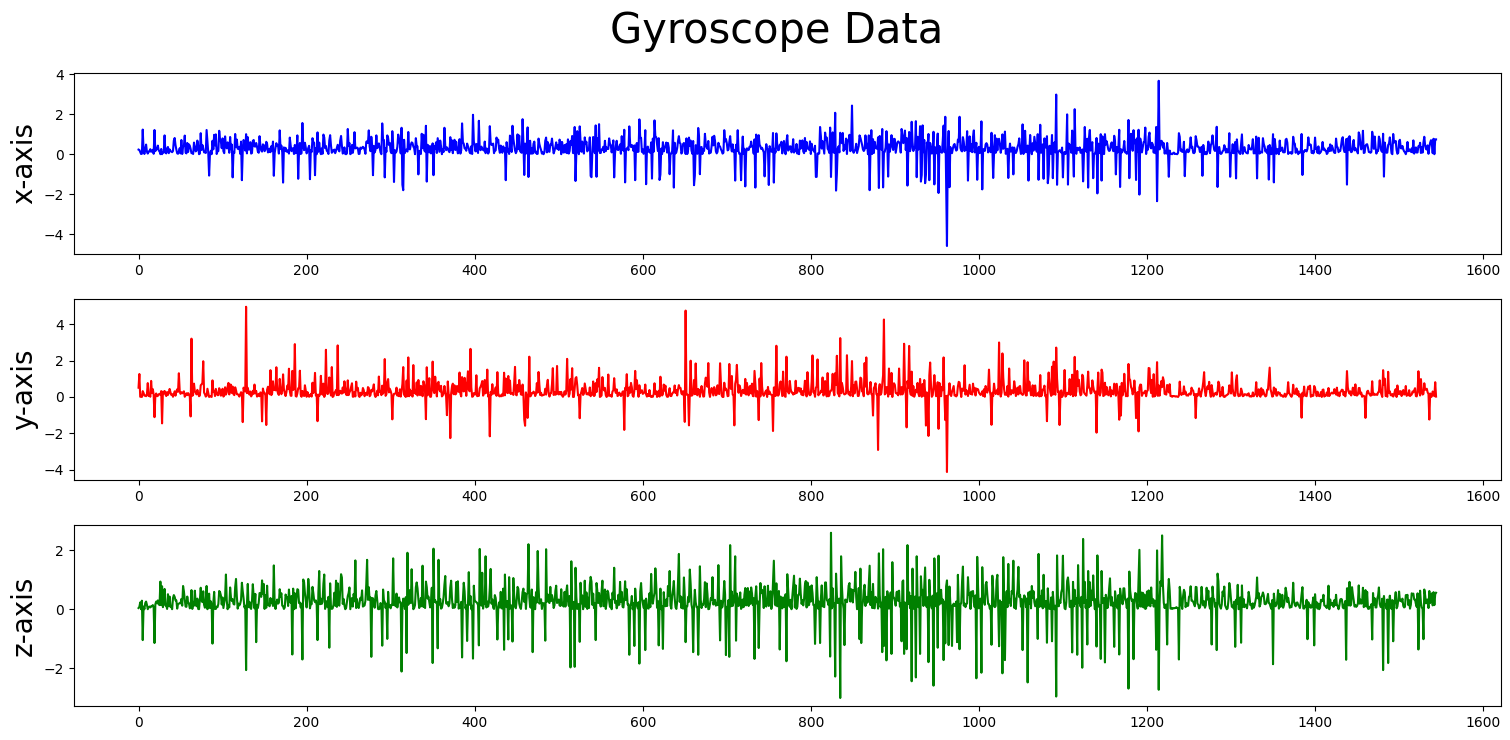

In [ ]:
# Abnormal x, y and z
fig, ax = plt.subplots(3,1)
fig.set_figheight(7.5)
fig.set_figwidth(15)

fig.suptitle("Gyroscope Data", fontsize = 30)
fig.tight_layout()

ax[0].plot(abnormal_data['gyro_x'], 'b')
ax[0].set_ylabel('x-axis', fontdict = {'size':20})
# ax[0].set_ylim(-5,5)

ax[1].plot(abnormal_data['gyro_y'], 'r')
ax[1].set_ylabel('y-axis', fontdict = {'size':20})
# ax[1].set_ylim(-5,5)

ax[2].plot(abnormal_data['gyro_z'], 'g')
ax[2].set_ylabel('z-axis', fontdict = {'size':20})
# ax[2].set_ylim(-5,5)

plt.show()

# Parameters calculation for normal

In [ ]:
import numpy as np
from scipy.signal import find_peaks
from scipy.signal import find_peaks, peak_widths, peak_prominences


# Find peaks in the acceleration magnitude
peaks, _ = find_peaks(normal_data['accel_mag'], height=4)

# Calculate step times in seconds
step_times = np.diff(peaks)

# Calculate step length
walking_speed = 1.42  # m/s, example average walking speed
step_length = walking_speed * step_times

# Calculate step velocity in m/s^2
step_velocity = step_length / step_times

# Calculate step count difference of each peaks
step_count = np.diff(peaks)

# Stride times in seconds
stride_time = np.diff(peaks) / 100

# Calculate stride length
time_between_samples = 1 / 100
stride_length = peaks[:-1] * time_between_samples


# Cadence: Cadence refers to the number of steps taken per unit of time (e.g., steps per minute). It can provide insights into the walking rhythm and pace.
cadence = 60 / step_times

# Calculate peak properties
peak_properties = peak_prominences(normal_data['accel_mag'], peaks)

# Extract peak properties
peak_prominences = peak_properties[0][:-1]

peak_widths = peak_widths(normal_data['accel_mag'], peaks)[0][:-1]


# Calculate mean and standard deviation of accelerometer x and y axes data for each step
accel_x_mean = [np.mean(normal_data['accel_x'][peaks[i]:peaks[i+1]]) for i in range(len(peaks)-1)]
accel_y_mean = [np.mean(normal_data['accel_y'][peaks[i]:peaks[i+1]]) for i in range(len(peaks)-1)]
accel_x_std = [np.std(normal_data['accel_x'][peaks[i]:peaks[i+1]]) for i in range(len(peaks)-1)]
accel_y_std = [np.std(normal_data['accel_y'][peaks[i]:peaks[i+1]]) for i in range(len(peaks)-1)]

# # Convert lists to 1D arrays
accel_x_mean_array = np.array(accel_x_mean)
accel_y_mean_array = np.array(accel_y_mean)
accel_x_std_array = np.array(accel_x_std)
accel_y_std_array = np.array(accel_y_std)

In [ ]:
# concatenate all feature
normal_feature = np.vstack((step_times, step_length, step_velocity, step_count, stride_time, stride_length,cadence,peak_prominences,peak_widths,accel_x_mean_array,accel_y_mean_array,accel_x_std_array,accel_y_std_array,np.zeros(step_times.shape[0]))).T

feature_names = ['step_times', 'step_length', 'step_velocity', 'step_count', 'stride_time', 'stride_length',"cadence","peak_prominences","peak_widths","accel_x_mean_array","accel_y_mean_array","accel_x_std_array","accel_y_std_array",'class']
normal_df = pd.DataFrame(normal_feature, columns=feature_names)



# Parameters calculation for abnormal

In [ ]:
import numpy as np
from scipy.signal import find_peaks
from scipy.signal import find_peaks, peak_widths, peak_prominences
# Find peaks in the acceleration magnitude
peaks, _ = find_peaks(abnormal_data['accel_mag'], height=4)

In [ ]:
import numpy as np
from scipy.signal import find_peaks
from scipy.signal import find_peaks, peak_widths, peak_prominences
# Find peaks in the acceleration magnitude
peaks, _ = find_peaks(abnormal_data['accel_mag'], height=7)

# Calculate step times in seconds
step_times = np.diff(peaks)

# Calculate step length
walking_speed = 1.42  # m/s, example average walking speed
step_length = walking_speed * step_times

# Calculate step velocity in m/s^2
step_velocity = step_length / step_times

# Calculate step count difference of each peaks
step_count = np.diff(peaks)

# Stride times in seconds
stride_time = np.diff(peaks) / 100

# Calculate stride length
time_between_samples = 1 / 100
stride_length = peaks[:-1] * time_between_samples


# Cadence: Cadence refers to the number of steps taken per unit of time (e.g., steps per minute). It can provide insights into the walking rhythm and pace.
cadence = 60 / step_times

# Calculate peak properties
peak_properties = peak_prominences(abnormal_data['accel_mag'], peaks)

# Extract peak properties
peak_prominences = peak_properties[0][:-1]

peak_widths = peak_widths(abnormal_data['accel_mag'], peaks)[0][:-1]

# Calculate mean and standard deviation of accelerometer x and y axes data for each step
accel_x_mean = [np.mean(abnormal_data['accel_x'][peaks[i]:peaks[i+1]]) for i in range(len(peaks)-1)]
accel_y_mean = [np.mean(abnormal_data['accel_y'][peaks[i]:peaks[i+1]]) for i in range(len(peaks)-1)]
accel_x_std = [np.std(abnormal_data['accel_x'][peaks[i]:peaks[i+1]]) for i in range(len(peaks)-1)]
accel_y_std = [np.std(abnormal_data['accel_y'][peaks[i]:peaks[i+1]]) for i in range(len(peaks)-1)]
# # Convert lists to 1D arrays
accel_x_mean_array = np.array(accel_x_mean)
accel_y_mean_array = np.array(accel_y_mean)
accel_x_std_array = np.array(accel_x_std)
accel_y_std_array = np.array(accel_y_std)


In [ ]:
# concatenate extracted parameters
abnormal_feature = np.vstack((step_times, step_length, step_velocity, step_count, stride_time, stride_length,cadence,peak_prominences,peak_widths,accel_x_mean_array,accel_y_mean_array,accel_x_std_array,accel_y_std_array,np.ones(step_times.shape[0]))).T

feature_names = ['step_times', 'step_length', 'step_velocity', 'step_count', 'stride_time', 'stride_length',"cadence","peak_prominences","peak_widths","accel_x_mean_array","accel_y_mean_array","accel_x_std_array","accel_y_std_array",'class']
abnormal_df = pd.DataFrame(abnormal_feature, columns=feature_names)



In [ ]:
df_data = pd.concat([normal_df,abnormal_df],axis=0)
# df_data.to_csv("/content/gdrive/MyDrive/gait_stabilize/df_data.csv",index = None)

In [ ]:
df_data = pd.read_csv("/content/gdrive/MyDrive/gait_stabilize/df_data.csv")

In [ ]:
df_data

,step_times,step_length,step_velocity,step_count,stride_time,stride_length,cadence,peak_prominences,peak_widths,accel_x_mean_array,accel_y_mean_array,accel_x_std_array,accel_y_std_array,class
0,3.0,4.26,1.42,3.0,0.03,0.02,20.0,0.069197,1.740100,1.186667,9.543333,0.805495,0.115854,0.0
1,3.0,4.26,1.42,3.0,0.03,0.05,20.0,0.155298,1.718256,0.250000,9.683333,0.170489,0.054365,0.0
2,4.0,5.68,1.42,4.0,0.04,0.08,15.0,0.777494,1.152246,1.827500,9.855000,0.350526,0.311006,0.0
3,2.0,2.84,1.42,2.0,0.02,0.12,30.0,1.246051,1.210002,-0.370000,9.110000,0.630000,1.260000,0.0
4,3.0,4.26,1.42,3.0,0.03,0.14,20.0,0.279859,0.752517,0.290000,9.313333,0.078740,0.249978,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,3.0,4.26,1.42,3.0,0.03,15.26,20.0,1.089625,1.352853,2.746667,9.720000,0.301588,0.446393,1.0
982,5.0,7.10,1.42,5.0,0.05,15.29,12.0,3.884495,1.696147,0.068000,8.596000,2.665178,1.778590,1.0
983,2.0,2.84,1.42,2.0,0.02,15.34,30.0,0.221517,0.701032,2.270000,9.395000,0.120000,0.145000,1.0
984,3.0,4.26,1.42,3.0,0.03,15.36,20.0,2.486621,4.910564,-0.830000,8.866667,1.904328,1.335224,1.0


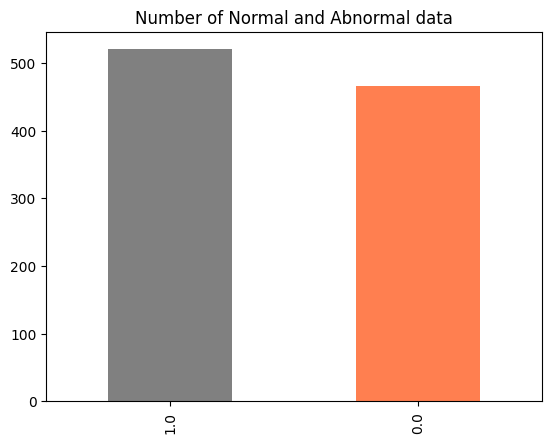

In [ ]:
df_data["class"].value_counts().plot(kind = "bar", color=["gray","coral"])
plt.title("Number of Normal and Abnormal data")
plt.show()

<Axes: >

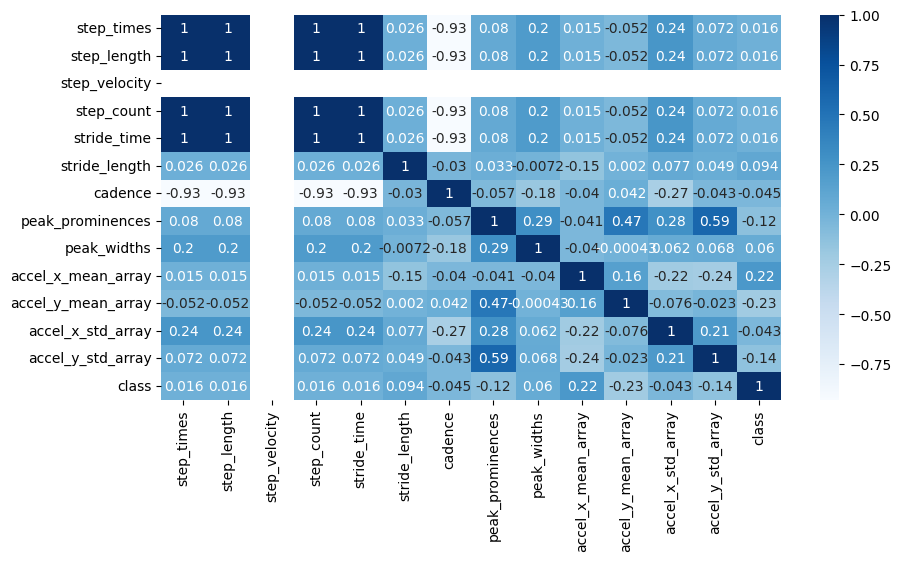

In [ ]:
# get correlations of each features in dataset
corrmat = df_data.corr()
plt.figure(figsize=(10,5))
# plot heat map
sns.heatmap(corrmat,annot=True,cmap="Blues")

Correlation Scores with Target Variable:
class                 1.000000
accel_y_mean_array    0.225292
accel_x_mean_array    0.218372
accel_y_std_array     0.136129
peak_prominences      0.117468
stride_length         0.093772
peak_widths           0.060280
cadence               0.045463
accel_x_std_array     0.042658
step_times            0.015651
step_count            0.015651
stride_time           0.015651
step_length           0.015651
step_velocity              NaN
Name: class, dtype: float64


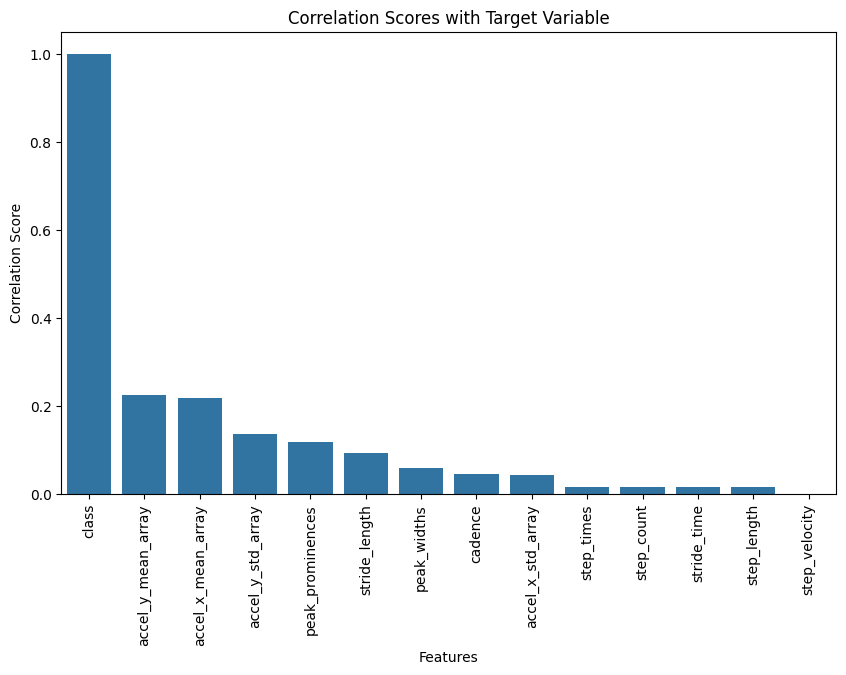

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the dataset with features and target variable loaded in a DataFrame (e.g., df)


# Compute the correlation matrix between features and the target variable
correlation_matrix = df_data.corr()

# Extract the correlation scores of each feature with the target variable
target_correlation_scores = correlation_matrix['class']

# Sort the features based on their correlation scores (absolute values) in descending order
sorted_features = target_correlation_scores.abs().sort_values(ascending=False)

# Print the correlation scores
print("Correlation Scores with Target Variable:")
print(sorted_features)

# Plot a bar plot to visualize the correlation scores
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features.index, y=sorted_features.values)
plt.title('Correlation Scores with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Score')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# there is no correlation for step velocity so drop from dataframe
df_data.drop("step_velocity",axis=1,inplace = True)

In [ ]:

# separate feature and labels
X = df_data.iloc[:,:-1]
y = df_data.iloc[:,-1]

In [ ]:
# data normaliation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
pickle.dump(scaler,open("/content/gdrive/MyDrive/gait_stabilize/scaler_weight.p","wb"))
scaled_data = scaler.transform(X)

In [ ]:
# data splits into training and testing part
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_data,y,test_size = 0.2,random_state = 42)

In [ ]:
data = {'total data':[len(X_train),len(X_test),len(y_train),len(y_test)]}
pd.DataFrame.from_dict(data, orient='index',columns=["xtrain","xtest","ytrain","ytest"])

,xtrain,xtest,ytrain,ytest
total data,788,198,788,198


<ipython-input-35-c41c2aa17b8a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=train_data, palette=train_color, alpha=0.7, label='Training Set')
<ipython-input-35-c41c2aa17b8a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=test_data, palette=test_color, alpha=0.7, label='Testing Set')


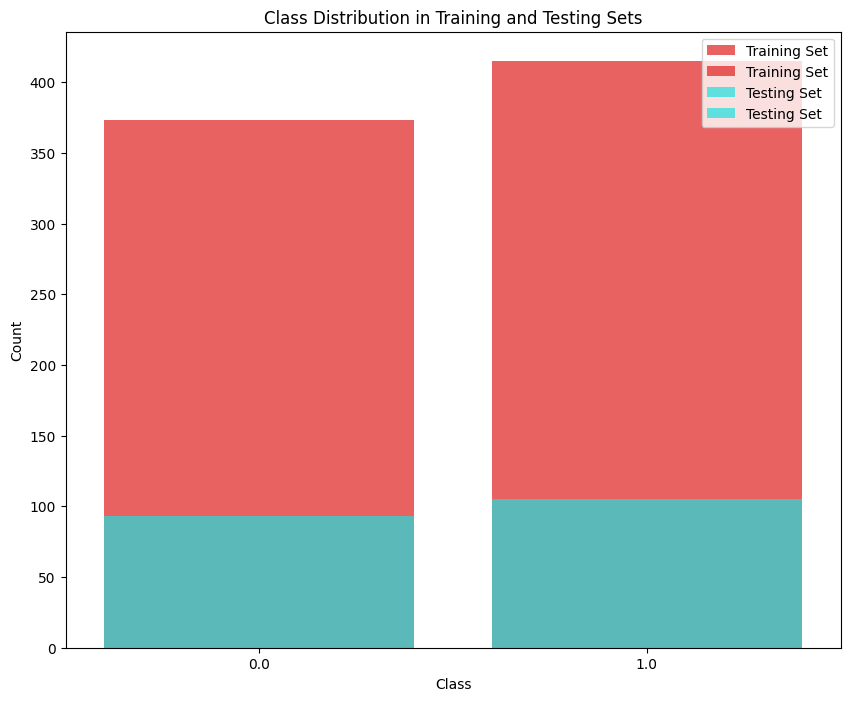

In [ ]:
# Convert the y_train and y_test back to a DataFrame for visualization
train_data = pd.DataFrame({'Feature1': X_train[:, 0], 'Feature2': X_train[:, 1], 'Class': y_train})
test_data = pd.DataFrame({'Feature1': X_test[:, 0], 'Feature2': X_test[:, 1], 'Class': y_test})

train_color = ["red","red"]
test_color = ["cyan","cyan"]
# Plot a bar plot to visualize the class distribution in the training and testing sets
plt.figure(figsize=(10, 8))
sns.countplot(x='Class', data=train_data, palette=train_color, alpha=0.7, label='Training Set')
sns.countplot(x='Class', data=test_data, palette=test_color, alpha=0.7, label='Testing Set')
plt.title('Class Distribution in Training and Testing Sets')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend()
plt.show()

# Training using Random Forst Classifier algorithm

In [ ]:


import pickle
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 600,max_depth = 15,min_samples_split=20,min_samples_leaf = 20)

# Train the model with the best parameters
rf_classifier.fit(X_train, y_train)
pickle.dump(rf_classifier,open("/content/gdrive/MyDrive/gait_stabilize/rf_weight.p","wb"))
ypred = rf_classifier.predict(X_test)
print("Accuracy score of RandomForestClassifier:",round(accuracy_score(y_test, ypred)*100,2))

Accuracy score of RandomForestClassifier: 74.75


# Validation

In [ ]:
import pickle
rf_weight = pickle.load(open("/content/gdrive/MyDrive/gait_stabilize/rf_weight.p","rb"))
ypred = rf_weight.predict(X_test)
print("Accuracy score of RandomForestClassifier:",round(accuracy_score(y_test, ypred)*100,2))

Accuracy score of RandomForestClassifier: 74.75


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
accuracy = accuracy_score(y_test, ypred)*100
precision = precision_score(y_test, ypred)*100
recall = recall_score(y_test, ypred)*100
f1score = f1_score(y_test, ypred)*100

In [ ]:
data = {'metrics':["%.2f" % accuracy,"%.2f" % precision,"%.2f" % recall,"%.2f" % f1score]}
pd.DataFrame.from_dict(data, orient='index',columns=["Accuracy","Precision","Recall","f1_score"])

,Accuracy,Precision,Recall,f1_score
metrics,74.75,78.35,72.38,75.25


# Classification report

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print("Classification Report: \n\n", classification_report(y_test, ypred))

Classification Report: 

               precision    recall  f1-score   support

         0.0       0.71      0.77      0.74        93
         1.0       0.78      0.72      0.75       105

    accuracy                           0.75       198
   macro avg       0.75      0.75      0.75       198
weighted avg       0.75      0.75      0.75       198



# Confusion matrix

Confusion Matrix:


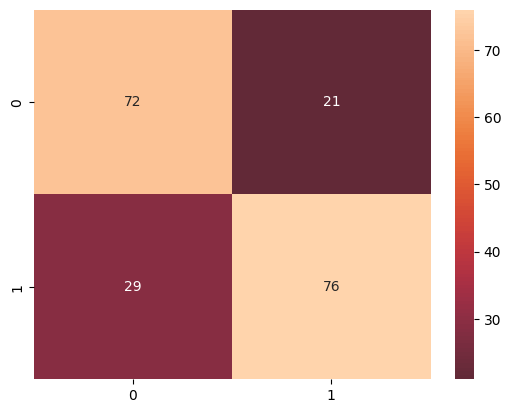

In [ ]:
# Compute the error.
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')

# drawing confusion matrix
sns.heatmap(CM, center = True , annot=True, fmt="d")
plt.show()

# Training using  KNN  Classifier algorithm

In [ ]:
import pickle
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Train the model with the best parameters
knn_classifier.fit(X_train, y_train)
ypred = knn_classifier.predict(X_test)
print("Accuracy score of KNN Classifier:",round(accuracy_score(y_test, ypred)*100,2))

Accuracy score of KNN Classifier: 74.24


# Validation

In [ ]:
import pickle
ypred_knn = knn_classifier.predict(X_test)
print("Accuracy score of RandomForestClassifier:",round(accuracy_score(y_test, ypred_knn)*100,2))

Accuracy score of RandomForestClassifier: 74.24


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
accuracy_knn = accuracy_score(y_test, ypred_knn)*100
precision_knn = precision_score(y_test, ypred_knn)*100
recall_knn = recall_score(y_test, ypred_knn)*100
f1score_knn = f1_score(y_test, ypred_knn)*100

In [ ]:
data = {'metrics':["%.2f" % accuracy_knn,"%.2f" % precision_knn,"%.2f" % recall_knn,"%.2f" % f1score_knn]}
pd.DataFrame.from_dict(data, orient='index',columns=["Accuracy","Precision","Recall","f1_score"])

,Accuracy,Precision,Recall,f1_score
metrics,74.24,77.55,72.38,74.88


# Classification report

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print("Classification Report: \n\n", classification_report(y_test, ypred_knn))

Classification Report: 

               precision    recall  f1-score   support

         0.0       0.71      0.76      0.74        93
         1.0       0.78      0.72      0.75       105

    accuracy                           0.74       198
   macro avg       0.74      0.74      0.74       198
weighted avg       0.74      0.74      0.74       198



# Confusion matrix

Confusion Matrix:


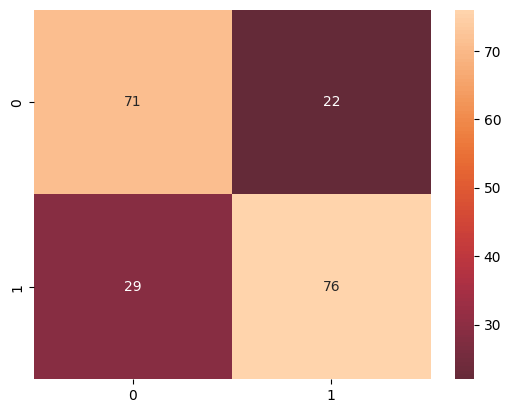

In [ ]:
# Compute the error.
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, ypred_knn)
print('Confusion Matrix:')

# drawing confusion matrix
sns.heatmap(CM, center = True , annot=True, fmt="d")
plt.show()

# Training using SVM algorithm

---



In [ ]:
from sklearn import svm
# Initialize the Support vector classifier
svm_model = svm.LinearSVC()
# Fit the classifier on the training data
svm_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

# Validation

In [ ]:
# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)
# Evaluate the classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of Svm algorithm: {accuracy_svm}")

Accuracy of Svm algorithm: 0.6818181818181818


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
accuracy_svm = accuracy_score(y_test, ypred)*100
precision_svm = precision_score(y_test, ypred)*100
recall_svm = recall_score(y_test, ypred)*100
f1score_svm = f1_score(y_test, ypred)*100

In [ ]:
data = {'metrics':["%.2f" % accuracy,"%.2f" % precision,"%.2f" % recall,"%.2f" % f1score]}
pd.DataFrame.from_dict(data, orient='index',columns=["Accuracy","Precision","Recall","f1_score"])

,Accuracy,Precision,Recall,f1_score
metrics,74.75,78.35,72.38,75.25


# Classification report

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.58      0.63        93
         1.0       0.68      0.77      0.72       105

    accuracy                           0.68       198
   macro avg       0.68      0.68      0.68       198
weighted avg       0.68      0.68      0.68       198



# Confusion matrix

Confusion Matrix:


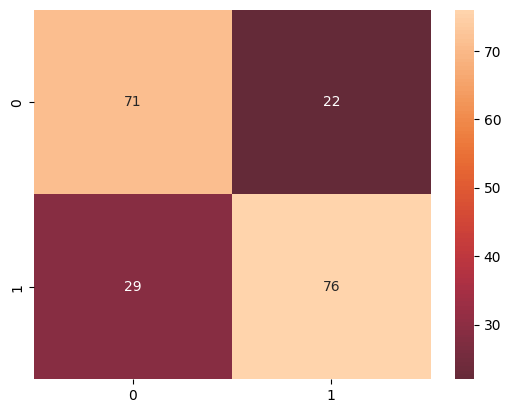

In [ ]:
# Compute the error.
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')

# drawing confusion matrix
sns.heatmap(CM, center = True , annot=True, fmt="d")
plt.show()

In [ ]:
pip install paho-mqtt==1.6.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for paho-mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62119 sha256=78490ca74ddbcc21fcac19fd0613d9cab41f613a5870b05a586dd33eb82028f9
  Stored in directory: /root/.cache/pip/wheels/8b/bb/0c/79444d1dee20324d442856979b5b519b48828b0bd3d05df84a
Successfully built paho-mqtt


In [ ]:
import paho.mqtt.client as mqtt
import time
import csv
from scipy.signal import find_peaks
from scipy import signal
import pickle
from scipy.signal import find_peaks, peak_widths, peak_prominences
import pandas as pd
import numpy as np

test_data = []

def on_message(client, userdata, message):
    global test_data
    receivedstring = str(message.payload.decode("utf-8"))
    data = receivedstring.split(",")
    test_data.append([float(i) for i in data])

    if len(test_data) == 7:
        print(test_data)
        column = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z','time']

        sample_data = test_data[-1][-1]

        test_df = pd.DataFrame(test_data, columns=column)
        test_df.drop("time",axis=1,inplace = True)

        # # Abnormal x, y and z
        # fig, ax = plt.subplots(3,1)
        # fig.set_figheight(7.5)
        # fig.set_figwidth(15)

        # fig.suptitle("Gyroscope Data", fontsize = 30)
        # fig.tight_layout()

        # ax[0].plot(test_df['gyro_x'], 'b')
        # ax[0].set_ylabel('x-axis', fontdict = {'size':20})
        # # ax[0].set_ylim(-5,5)

        # ax[1].plot(test_df['gyro_y'], 'r')
        # ax[1].set_ylabel('y-axis', fontdict = {'size':20})
        # # ax[1].set_ylim(-5,5)

        # ax[2].plot(test_df['gyro_z'], 'g')
        # ax[2].set_ylabel('z-axis', fontdict = {'size':20})
        # # ax[2].set_ylim(-5,5)

        # plt.show()

        test_df['accel_mag'] = (test_df['accel_x'] * 2 + test_df['accel_y'] * 2 + test_df['accel_z'] * 2) * 0.5

        # Find peaks in the acceleration magnitude
        peaks, _ = find_peaks(test_df['accel_mag'], height=7)

        # Calculate step times in seconds
        step_times = np.diff(peaks)

        # Calculate step length
        walking_speed = 1.42  # m/s, example average walking speed
        step_length = walking_speed * step_times

        # Calculate step velocity in m/s^2
        step_velocity = step_length / step_times

        # Calculate step count difference of each peaks
        step_count = np.diff(peaks)

        # Stride times in seconds
        stride_time = np.diff(peaks) / 100

        # Calculate stride length
        time_between_samples = 1 / 100
        stride_length = peaks[:-1] * time_between_samples

        # Cadence: Cadence refers to the number of steps taken per unit of time (e.g., steps per minute). It can provide insights into the walking rhythm and pace.
        cadence = 60 / step_times

        # Calculate peak properties

        peak_properties_result = peak_prominences(test_df['accel_mag'], peaks)

        # Extract peak properties
        peak_prominences_values = peak_properties_result[0][:-1]
        peak_widths_values = peak_widths(test_df['accel_mag'], peaks)[0][:-1]

        # Calculate mean and standard deviation of accelerometer x and y axes data for each step
        accel_x_mean = [np.mean(test_df['accel_x'][peaks[i]:peaks[i + 1]]) for i in range(len(peaks) - 1)]
        accel_y_mean = [np.mean(test_df['accel_y'][peaks[i]:peaks[i + 1]]) for i in range(len(peaks) - 1)]
        accel_x_std = [np.std(test_df['accel_x'][peaks[i]:peaks[i + 1]]) for i in range(len(peaks) - 1)]
        accel_y_std = [np.std(test_df['accel_y'][peaks[i]:peaks[i + 1]]) for i in range(len(peaks) - 1)]

        # Convert lists to 1D arrays
        accel_x_mean_array = np.array(accel_x_mean)
        accel_y_mean_array = np.array(accel_y_mean)
        accel_x_std_array = np.array(accel_x_std)
        accel_y_std_array = np.array(accel_y_std)
        # concatenate extracted parameters
        test_feature = np.vstack((step_times, step_length, step_count, stride_time, stride_length, cadence,
                                  peak_prominences_values, peak_widths_values,
                                  accel_x_mean_array, accel_y_mean_array, accel_x_std_array, accel_y_std_array)).T

        print(test_feature.shape)

        client.publish("gait_input",str(test_feature))



        if test_feature.any():
            rf_weight = pickle.load(open("/content/gdrive/MyDrive/gait_stabilize/rf_weight.p", "rb"))
            ypred = rf_weight.predict(test_feature)
            if sample_data ==0.5:
                client.publish("gait_predict",str(1))
            else:
                client.publish("gait_predict",str(0))

        test_data = []

# Set up MQTT client
broker_address = "broker.hivemq.com"
client = mqtt.Client("PROJECT")
client.connect(broker_address)
client.on_message = on_message
client.subscribe("gait_001")
client.loop_forever()

[[2.9, -1.56, 9.86, 0.01, 0.0, 0.06, 1.0], [2.9, -1.52, 9.71, 0.0, 0.06, 0.05, 1.0], [3.17, -1.2, 9.65, 0.13, 0.06, 0.02, 1.0], [3.51, -1.05, 9.77, 0.05, 0.11, 0.02, 1.0], [3.58, -1.05, 9.52, 0.05, 0.08, 0.06, 1.0], [3.34, -1.11, 9.9, 0.0, 0.02, 0.02, 1.0], [3.43, -1.1, 9.61, 0.0, 0.03, 0.02, 1.0]]
(1, 12)
[[3.52, -1.12, 9.7, 0.01, 0.05, 0.02, 1.0], [3.44, -1.21, 9.61, 0.0, 0.05, 0.02, 1.0], [3.38, -1.25, 9.63, 0.01, 0.04, 0.02, 1.0], [3.6, -1.35, 9.28, 0.04, 0.11, 0.12, 1.0], [3.5, -1.13, 9.65, 0.03, 0.04, 0.02, 1.0], [3.37, -1.21, 9.64, 0.0, 0.06, 0.01, 1.0], [3.38, -1.34, 9.59, 0.0, 0.05, 0.02, 1.0]]
(0, 12)
[[3.12, 0.74, 10.12, 0.07, 0.09, 0.2, 1.0], [2.92, -1.25, 10.12, 0.03, 0.01, 0.04, 1.0], [3.36, -1.24, 9.68, 0.01, 0.05, 0.04, 1.0], [3.34, -1.22, 9.71, 0.0, 0.02, 0.0, 1.0], [3.46, -1.33, 9.88, 0.02, 0.04, 0.02, 1.0], [3.46, -1.31, 9.49, 0.0, 0.05, 0.03, 1.0], [3.39, -1.37, 9.49, 0.06, 0.06, 0.02, 1.0]]
(0, 12)
[[3.41, -1.41, 9.67, 0.02, 0.04, 0.02, 1.0], [3.33, -1.34, 9.64, 0.

<ipython-input-4-761da192dfb4>:84: PeakPropertyWarning: some peaks have a width of 0
  peak_widths_values = peak_widths(test_df['accel_mag'], peaks)[0][:-1]


[[0.03, -1.48, 10.16, 0.0, 0.04, 0.0, 1.0], [0.02, -1.47, 10.18, 0.0, 0.05, 0.0, 1.0], [0.04, -1.47, 10.13, 0.01, 0.04, 0.0, 1.0], [0.04, -1.47, 10.17, 0.0, 0.04, 0.0, 1.0], [0.04, -1.45, 10.15, 0.0, 0.04, 0.0, 1.0], [0.03, -1.47, 10.17, 0.01, 0.05, 0.0, 1.0], [0.0, -1.45, 10.19, 0.0, 0.04, 0.0, 1.0]]
(1, 12)
[[0.05, -1.44, 10.19, 0.01, 0.05, 0.0, 1.0], [0.04, -1.47, 10.19, 0.0, 0.04, 0.0, 1.0], [0.04, -1.42, 10.15, 0.01, 0.05, 0.0, 1.0], [0.04, -1.41, 10.18, 0.01, 0.05, 0.0, 1.0], [0.03, -1.44, 10.16, 0.0, 0.04, 0.0, 1.0], [0.01, -1.42, 10.17, 0.0, 0.04, 0.0, 1.0], [0.05, -1.43, 10.2, 0.0, 0.04, 0.0, 1.0]]
(0, 12)
[[0.03, -1.45, 10.16, 0.0, 0.04, 0.0, 1.0], [0.05, -1.43, 10.15, 0.0, 0.04, 0.0, 1.0], [0.04, -1.44, 10.17, 0.0, 0.05, 0.0, 1.0], [0.06, -1.42, 10.17, 0.01, 0.05, 0.0, 1.0], [0.0, -1.43, 10.22, 0.0, 0.05, 0.0, 1.0], [0.02, -1.43, 10.23, 0.02, 0.06, 0.0, 1.0], [0.05, -1.42, 10.07, 0.0, 0.03, 0.0, 1.0]]
(1, 12)
[[0.06, -1.41, 10.19, 0.02, 0.04, 0.0, 1.0], [0.03, -1.39, 10.12, 